In [1]:
!pip install ipywidgets
import widgets

ModuleNotFoundError: No module named 'widgets'

In [2]:
import json 
import numpy as np
import pandas as pd

In [3]:
import io
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import plotly.express as px
from pandas.plotting import scatter_matrix

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import Birch

In [5]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Pre-Proccessing Steps

In [6]:
#Import CSV
import pandas as pd
df_raw = pd.read_csv('Cluster_5_6FINAL.csv')

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98971 entries, 0 to 98970
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         98971 non-null  int64  
 1   X                  98971 non-null  float64
 2   Y                  98971 non-null  int64  
 3   OSM_ID             98971 non-null  int64  
 4   AGE                98971 non-null  int64  
 5   HEIGHT             98971 non-null  float64
 6   AREA               98971 non-null  float64
 7   VOLUME             98971 non-null  float64
 8   MBR_LENGTH         98971 non-null  float64
 9   MBR_WIDTH          98971 non-null  float64
 10  MBR_L/W            98971 non-null  float64
 11  PERIMETER          98971 non-null  float64
 12  WALL_AREA          98971 non-null  float64
 13  VERTEX_COUNT(S)    98971 non-null  int64  
 14  VERTEX_COMPLEXITY  98971 non-null  float64
 15  ERI                98971 non-null  float64
 16  CONVEX             989

In [8]:
# checking columns for missing values
df_raw.isna().sum()

Unnamed: 0           0
X                    0
Y                    0
OSM_ID               0
AGE                  0
HEIGHT               0
AREA                 0
VOLUME               0
MBR_LENGTH           0
MBR_WIDTH            0
MBR_L/W              0
PERIMETER            0
WALL_AREA            0
VERTEX_COUNT(S)      0
VERTEX_COMPLEXITY    0
ERI                  0
CONVEX               0
RI                   0
DENSITY              0
NO_POLYLINES         0
BBOX(A)/AREA         0
PER/AREA             0
AREA-VOIDAREA        0
Cluster              0
PER(A)/AREA          0
dtype: int64

In [9]:
# Select subset of columns aka variables
Columns_of_interest = ["X" ,
                      "Y",
                      "OSM_ID",
                      "AGE",
                      "HEIGHT",
                      "AREA",
                      "VOLUME",
                      "MBR_LENGTH",
                      "MBR_WIDTH",
                      "MBR_L/W",
                      "PERIMETER",
                      "WALL_AREA",
                       "VERTEX_COUNT(S)",
                       "VERTEX_COMPLEXITY",
                       "ERI",
                       "CONVEX",
                       "RI",
                       "DENSITY",
                       "NO_POLYLINES",
                       "BBOX(A)/AREA",
                       "PER/AREA",
                       "AREA-VOIDAREA",
                       "PER(A)/AREA",
                       "Cluster",
                      ]
# create new dataframe 
df = df_raw[Columns_of_interest]

In [10]:
# Finding correlation (uncover correlated variables)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\james\AppData\Local\Temp\ipykernel_944\2887697062.py:3: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



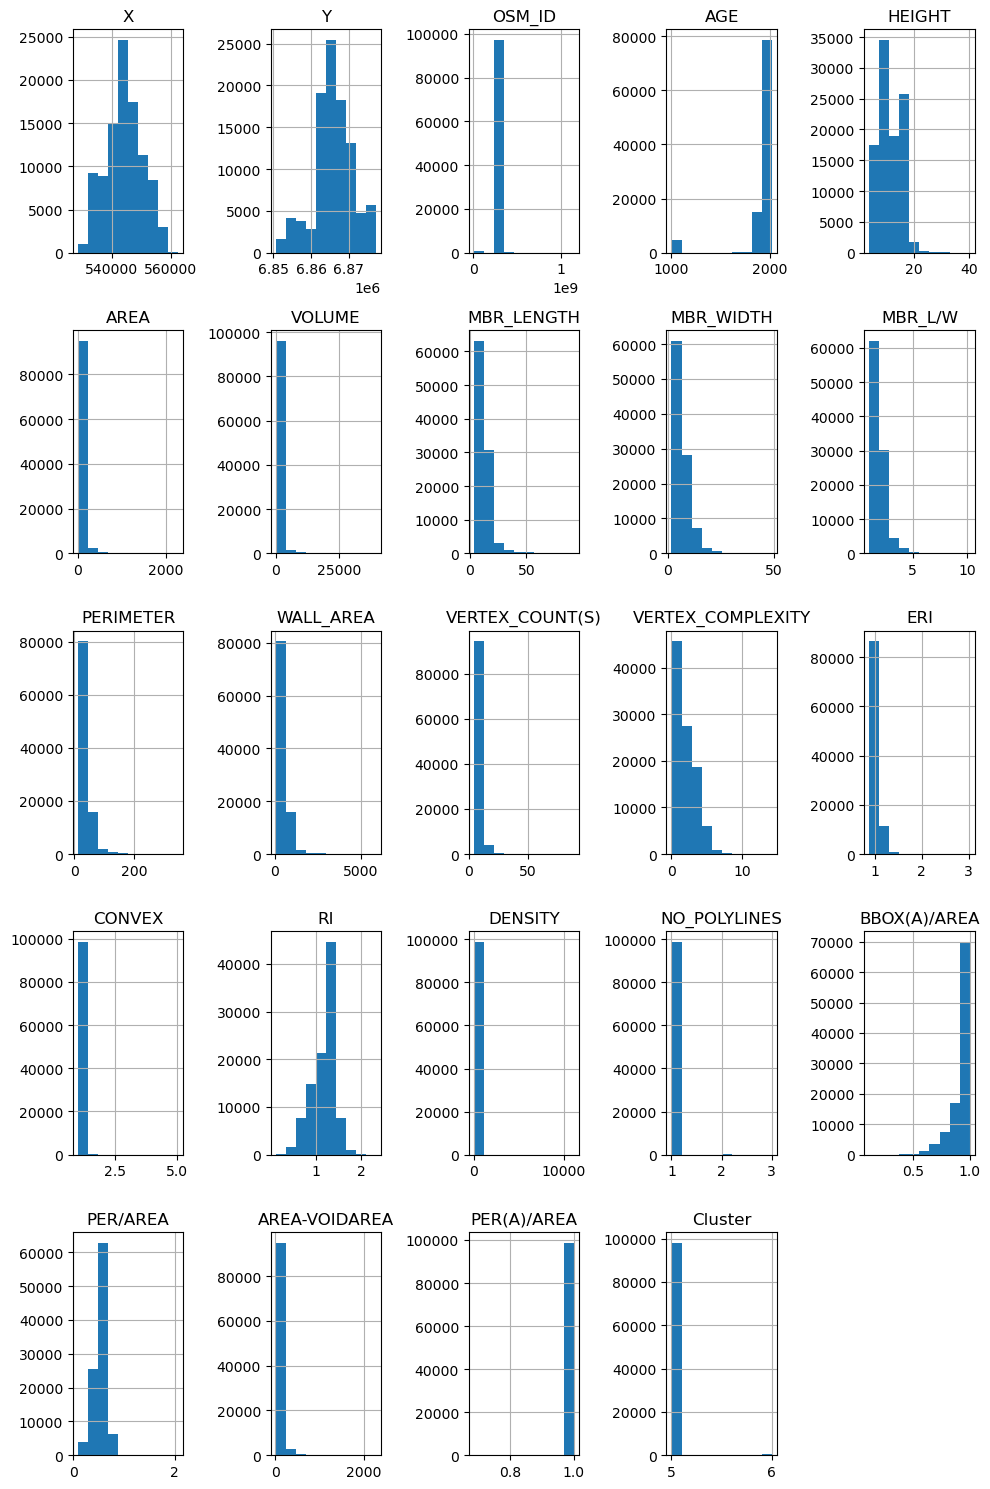

In [11]:
# Data distribution (histograms) for each variable
ax = df.hist(figsize=(10,15))
plt.tight_layout()
plt.show()

In [12]:
# Extract coords from data
df_coords = df[['X', 'Y']]

# df_data   = df[['ForestPark', 'UrbanParks', 'HN_noise_40', 'RailwaySystem', 'PortSystem']]
df_data   = df.drop(["X" , "Y", "OSM_ID", "AGE", "HEIGHT", "Cluster", "VOLUME", "PERIMETER", "WALL_AREA", "AREA", "MBR_LENGTH", "MBR_WIDTH", "DENSITY", "NO_POLYLINES", "BBOX(A)/AREA", "AREA-VOIDAREA"], axis=1)

# Scale data
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(
    scaler.fit_transform(df_data),
    columns=df_data.columns)

In [13]:
def map_clustering_results(coords, model):
    labels = model.labels_
    for label in np.unique(labels):
        x = coords['X'].to_numpy()[labels == label]
        y = coords['Y'].to_numpy()[labels == label]
        plt.scatter(x, y, label=model.labels_)

In [14]:
print(scaled_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98971 entries, 0 to 98970
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MBR_L/W            98971 non-null  float64
 1   VERTEX_COUNT(S)    98971 non-null  float64
 2   VERTEX_COMPLEXITY  98971 non-null  float64
 3   ERI                98971 non-null  float64
 4   CONVEX             98971 non-null  float64
 5   RI                 98971 non-null  float64
 6   PER/AREA           98971 non-null  float64
 7   PER(A)/AREA        98971 non-null  float64
dtypes: float64(8)
memory usage: 6.0 MB
None


# BIRCH CLUSTERING

In [15]:
#Birch is computed as a method of Data reduction, NOT as a final clustering method

In [16]:
# Perform Birch clustering
brc_model = Birch(branching_factor=2, n_clusters=None, threshold=0.05, compute_labels=True)
brc_model.fit(scaled_df)

Birch(branching_factor=2, n_clusters=None, threshold=0.05)

In [17]:
# Add the Birch clustering labels to the DataFrame
df['Birch Cluster'] = brc_model.labels_

# DIANA CLUSTERING 

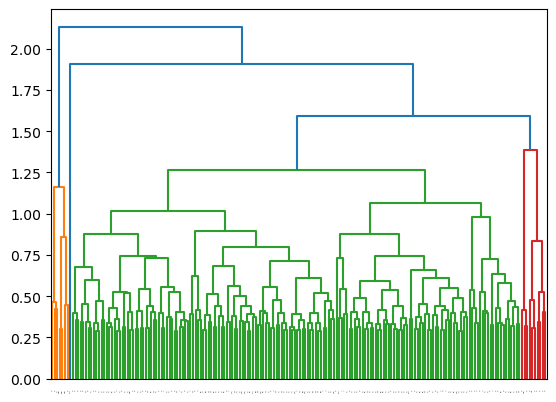

<Figure size 1500x1000 with 0 Axes>

In [18]:
# Compute linkage matrix for hierarchical clustering
dist_mat = linkage(brc_model.subcluster_centers_, method='complete')

# Generate dendrogram
dendrogram(dist_mat, truncate_mode='lastp', p=190, leaf_rotation=90., leaf_font_size=1., show_contracted=True)

# Plot the dendrogram
plt.figure(figsize=(15, 10))  # Adjust the figure size as per your preference
plt.show()

In [25]:
# Perform DIANA clustering using the specified threshold
diana_model = fcluster(dist_mat, t=0.7, criterion='distance')

In [26]:
# Create a mapping between Birch subcluster labels and DIANA cluster labels
mapping = {}
for i, birch_label in enumerate(np.unique(df['Birch Cluster'])):
    mapping[birch_label] = diana_model[i % len(diana_model)]

In [27]:
# Add the DIANA clustering labels to the Birch subcluster labels
df['DIANA Cluster'] = df['Birch Cluster'].map(mapping)

In [28]:
print(df)

              X        Y      OSM_ID   AGE    HEIGHT       AREA        VOLUME  \
0      543419.6  6865734    57858477  1883   3.71632   24.48315     90.987220   
1      546673.4  6865699   268998926  1922  13.42790   78.55155   1054.782358   
2      546673.4  6865699   268998926  1922  13.42790   78.55155   1054.782358   
3      546673.4  6865699   268998926  1922  13.42790   78.55155   1054.782358   
4      541880.1  6863804   277154174  1928  10.06230  194.12325   1953.326378   
...         ...      ...         ...   ...       ...        ...           ...   
98966  539426.5  6864817  1148323938  2010  21.40250  561.39740  12015.307850   
98967  539425.3  6864896  1148323940  2010  21.41250  565.26760  12103.792490   
98968  539451.3  6864975  1148325665  2009  21.48500  563.27785  12102.024610   
98969  539371.8  6864973  1148325666  2009  21.49140  561.30960  12063.329140   
98970  544467.4  6867650  1153501055  1005  14.05420   77.20880   1085.107917   

       MBR_LENGTH  MBR_WIDT

In [29]:
#check that you have the correct amount of clusters added back to your df
min_cluster = df['DIANA Cluster'].min()
max_cluster = df['DIANA Cluster'].max()

print("DIANA Cluster range:", min_cluster, "-", max_cluster)

DIANA Cluster range: 1 - 22


In [30]:
# Count the number of buildings in each cluster assignment
cluster_counts = df['DIANA Cluster'].value_counts()

In [31]:
print(cluster_counts)

9     46471
11    13100
7     12417
10    12278
8      3777
14     3013
15     2950
6      1360
5      1120
18     1004
4       515
17      414
1       145
21      139
20       92
13       59
3        57
16       24
19       16
12       13
2         6
22        1
Name: DIANA Cluster, dtype: int64


In [32]:
#Export CSV with Cluster Values
df.to_csv('DIANACL5_6_geometrydeatils.csv', index=False)

# Cluster Evaluation

Text(0.5, 1.0, 'DIANA Clustering Results')

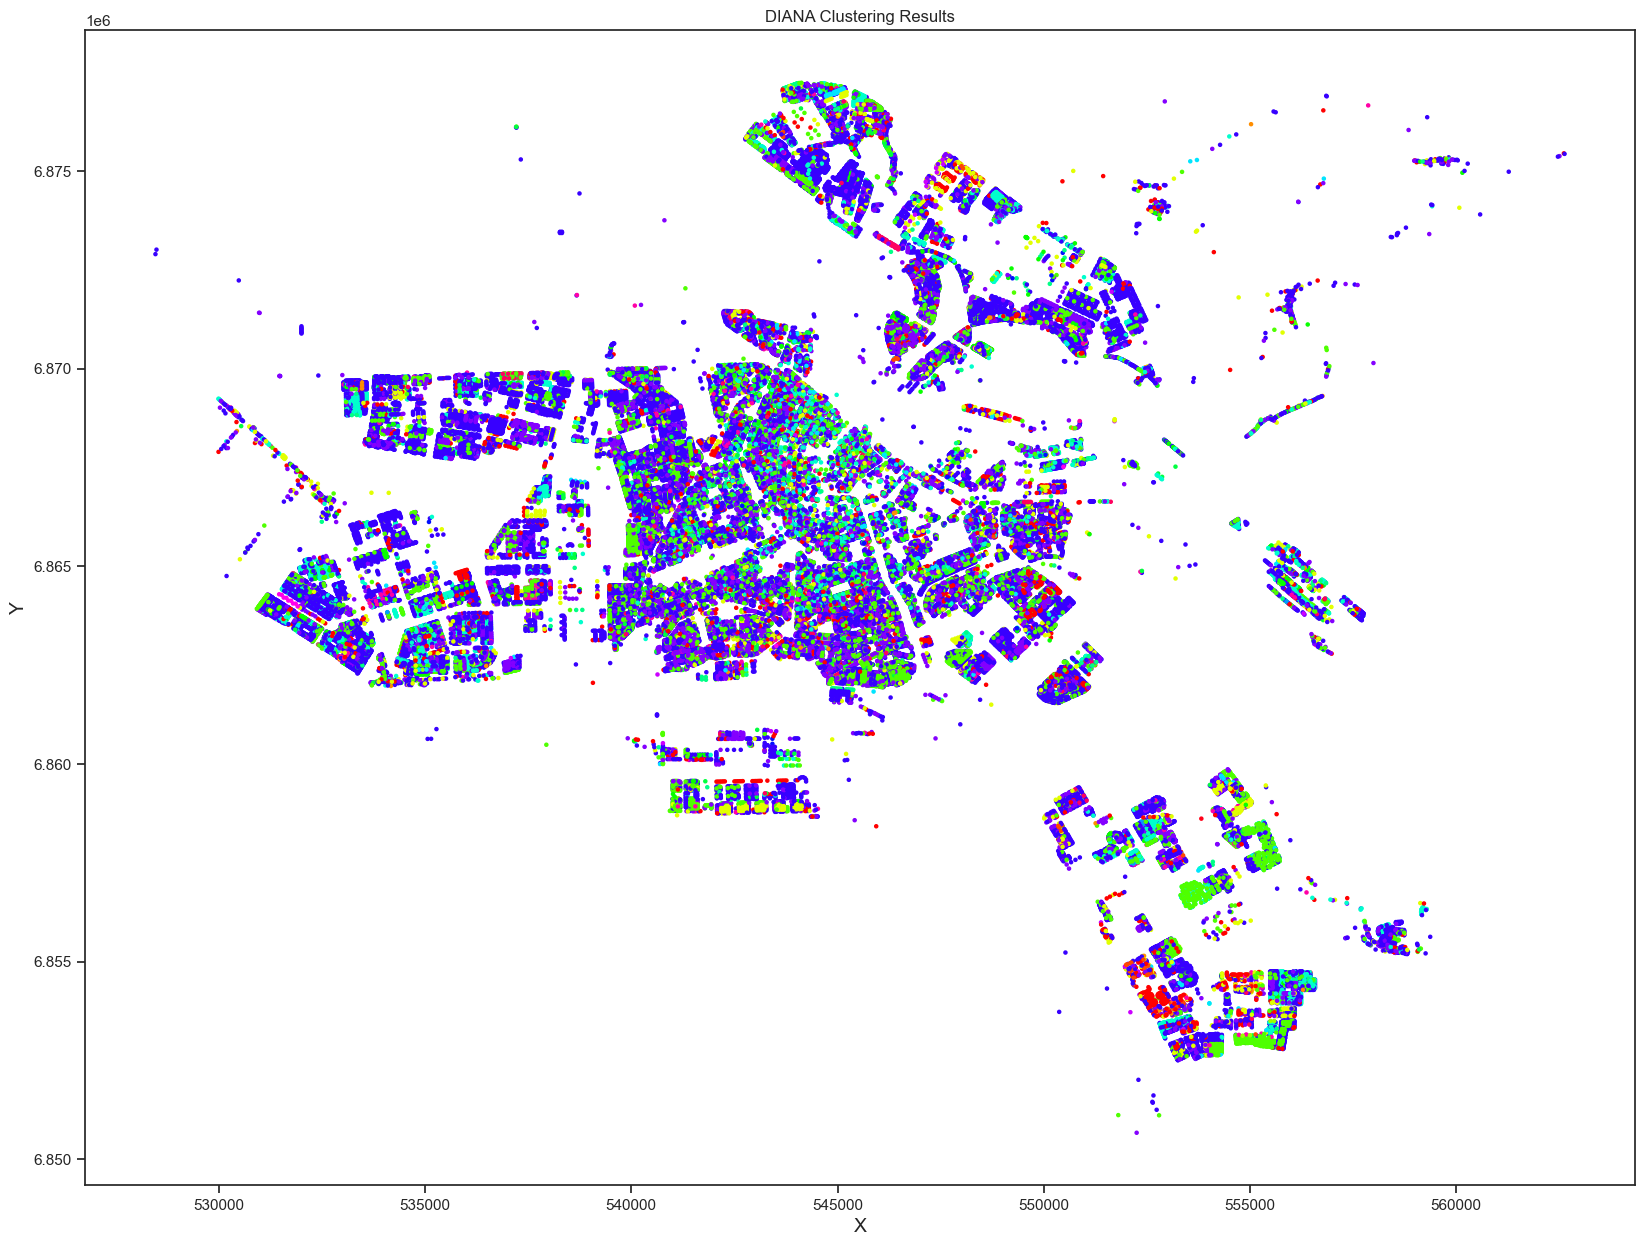

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Extract cluster labels
labels = df['DIANA Cluster']

# Get the number of unique clusters
num_clusters = len(np.unique(labels))

# Create a dictionary to map cluster labels to colors
color_map = {
    1: (0 / 255, 16 / 255, 255 / 255),   # Cluster 1
    2: (0 / 255, 87 / 255, 255 / 255),   # Cluster 2
    3: (0 / 255, 158 / 255, 255 / 255),  # Cluster 3
    4: (0 / 255, 229 / 255, 255 / 255),  # Cluster 4
    5: (0 / 255, 255 / 255, 63 / 255),   # Cluster 5
    6: (0 / 255, 255 / 255, 134 / 255),  # Cluster 6
    7: (0 / 255, 255 / 255, 205 / 255),  # Cluster 7
    8: (8 / 255, 255 / 255, 0 / 255),    # Cluster 8
    9: (55 / 255, 0 / 255, 255 / 255),   # Cluster 9
    10: (79 / 255, 255 / 255, 0 / 255),  # Cluster 10
    11: (132 / 255, 0 / 255, 255 / 255), # Cluster 11
    12: (156 / 255, 255 / 255, 0 / 255), # Cluster 12
    13: (203 / 255, 0 / 255, 255 / 255), # Cluster 13
    14: (226 / 255, 255 / 255, 0 / 255), # Cluster 14
    15: (255 / 255, 0 / 255, 0 / 255),   # Cluster 15
    16: (255 / 255, 0 / 255, 24 / 255),  # Cluster 16
    17: (255 / 255, 0 / 255, 95 / 255),  # Cluster 17
    18: (255 / 255, 0 / 255, 166 / 255), # Cluster 18
    19: (255 / 255, 0 / 255, 237 / 255), # Cluster 19
    20: (255 / 255, 71 / 255, 0 / 255),  # Cluster 20
    21: (255 / 255, 142 / 255, 0 / 255), # Cluster 21
    22: (255 / 255, 213 / 255, 0 / 255)  # Cluster 22
}

# Create scatter plot with different colors for each cluster
plt.figure(figsize=(20, 15))  # set figure size
plt.scatter(df['X'], df['Y'], c=labels.map(color_map), s=5)  # set marker size

# Add axis labels and title
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.title('DIANA Clustering Results')


In [55]:
import seaborn as sns

<Figure size 1500x1500 with 0 Axes>

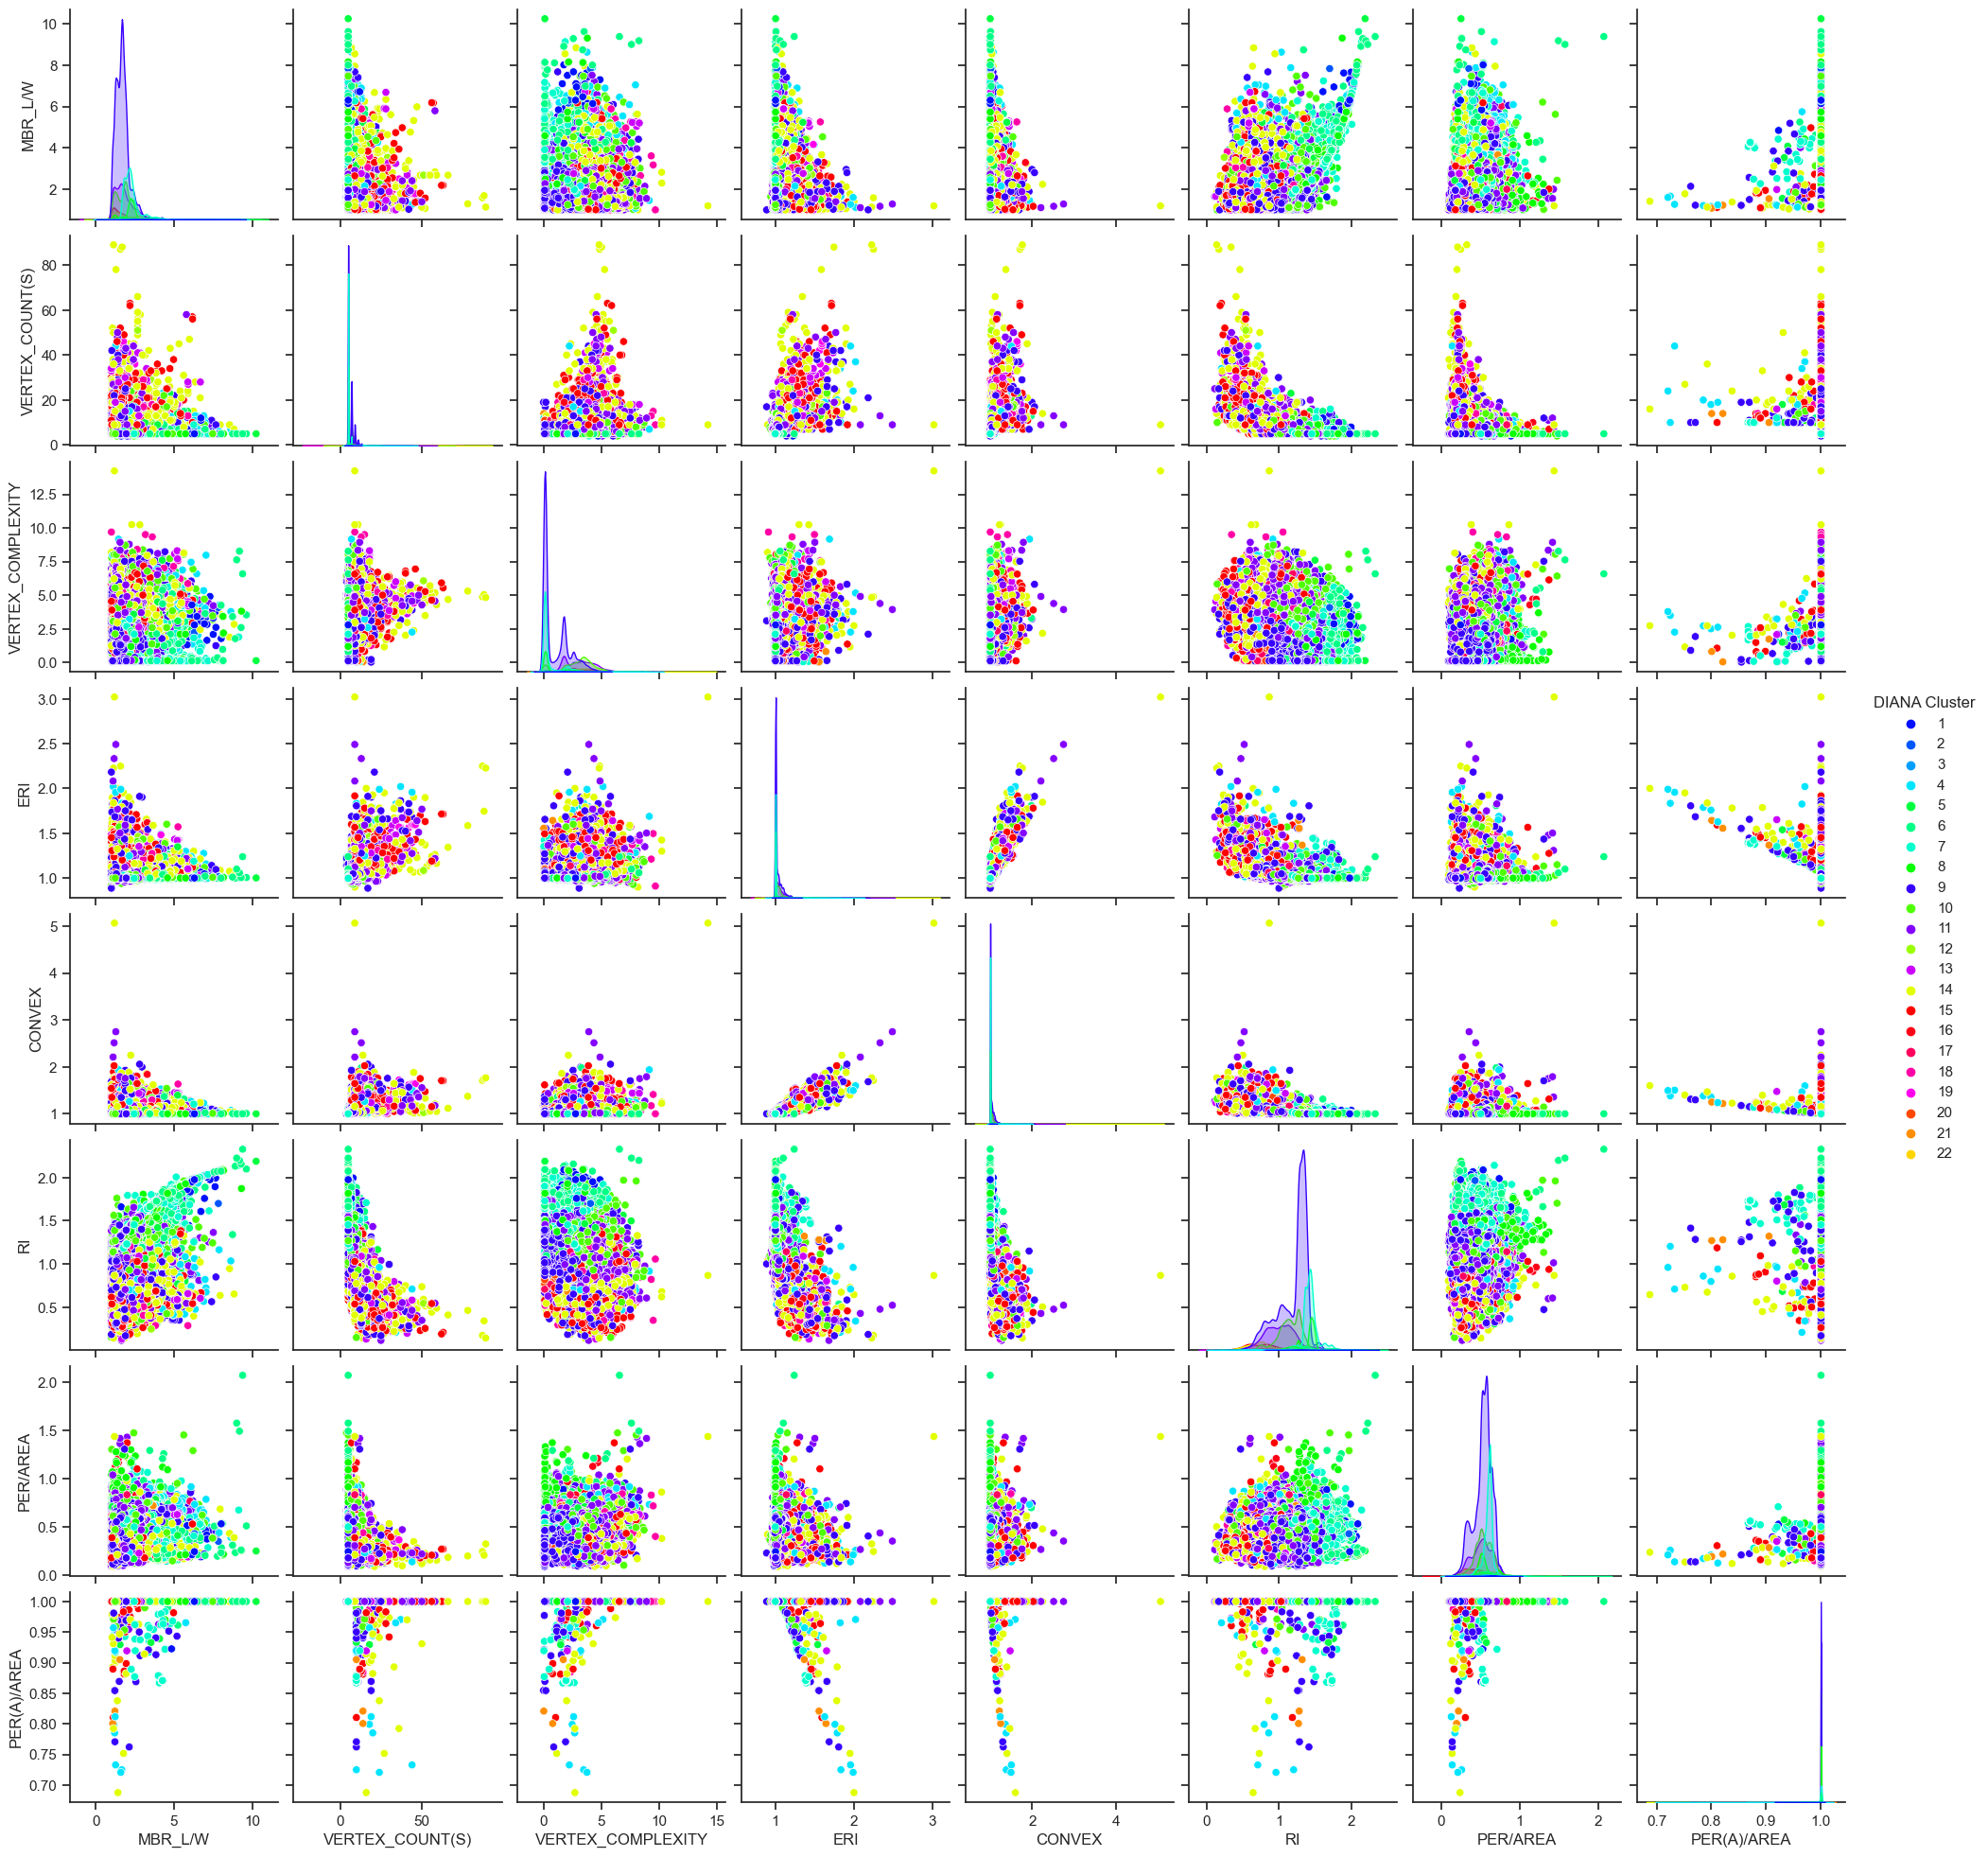

In [58]:
# Select the relevant columns for pairwise plotting
columns_of_interest = ['MBR_L/W', 'VERTEX_COUNT(S)', 'VERTEX_COMPLEXITY', 'ERI', 'CONVEX', 'RI', 'PER/AREA', 'PER(A)/AREA', 'DIANA Cluster']

# Subset the DataFrame with the selected columns
subset_df = df[columns_of_interest]

# Drop rows with missing values (NaN)
subset_df = subset_df.dropna()

# Set the size of the figure
plt.figure(figsize=(15, 15))  # Adjust the figure size as per your preference

# Set the style of the plot
sns.set(style="ticks")

# Create a pairplot with cluster colors
sns.pairplot(subset_df, hue='DIANA Cluster', palette=color_map)

# Show the plot
plt.show()


In [59]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98971 entries, 0 to 98970
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  98971 non-null  float64
 1   Y                  98971 non-null  int64  
 2   OSM_ID             98971 non-null  int64  
 3   AGE                98971 non-null  int64  
 4   HEIGHT             98971 non-null  float64
 5   AREA               98971 non-null  float64
 6   VOLUME             98971 non-null  float64
 7   MBR_LENGTH         98971 non-null  float64
 8   MBR_WIDTH          98971 non-null  float64
 9   MBR_L/W            98971 non-null  float64
 10  PERIMETER          98971 non-null  float64
 11  WALL_AREA          98971 non-null  float64
 12  VERTEX_COUNT(S)    98971 non-null  int64  
 13  VERTEX_COMPLEXITY  98971 non-null  float64
 14  ERI                98971 non-null  float64
 15  CONVEX             98971 non-null  float64
 16  RI                 989

In [77]:
# df_data   = df[['ForestPark', 'UrbanParks', 'HN_noise_40', 'RailwaySystem', 'PortSystem']]
df_data02   = df.drop(["X" , "Y", "Birch Cluster", "OSM_ID", "AGE", "HEIGHT", "Cluster", "VOLUME", "PERIMETER", "WALL_AREA", "AREA", "MBR_LENGTH", "MBR_WIDTH", "DENSITY", "NO_POLYLINES", "BBOX(A)/AREA", "AREA-VOIDAREA"], axis=1)

# Select the columns to be scaled
columns_to_scale = df_data02.columns.drop("DIANA Cluster")

# Scale the selected columns
scaler = MinMaxScaler()
scaled_columns = scaler.fit_transform(df_data02[columns_to_scale])

# Create a DataFrame with the scaled columns and the "DIANA Cluster" column
scaled_df_LG = pd.DataFrame(scaled_columns, columns=columns_to_scale)
scaled_df_LG["DIANA Cluster"] = df_data02["DIANA Cluster"]

In [78]:
print(scaled_df_LG.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98971 entries, 0 to 98970
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MBR_L/W            98971 non-null  float64
 1   VERTEX_COUNT(S)    98971 non-null  float64
 2   VERTEX_COMPLEXITY  98971 non-null  float64
 3   ERI                98971 non-null  float64
 4   CONVEX             98971 non-null  float64
 5   RI                 98971 non-null  float64
 6   PER/AREA           98971 non-null  float64
 7   PER(A)/AREA        98971 non-null  float64
 8   DIANA Cluster      98971 non-null  int32  
dtypes: float64(8), int32(1)
memory usage: 6.4 MB
None


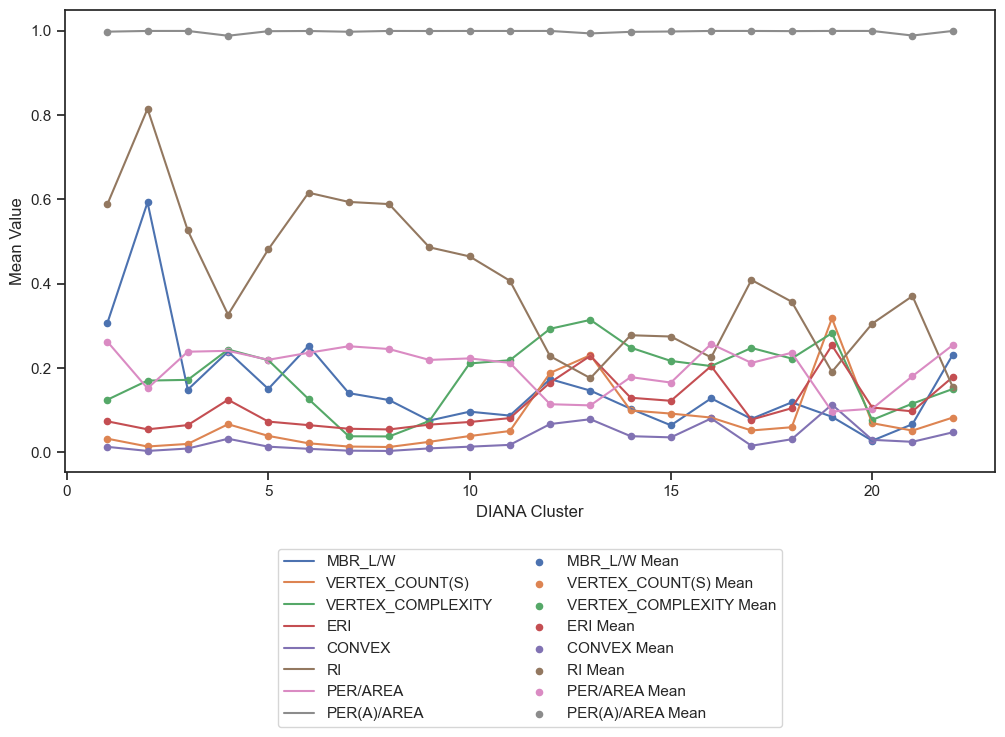

In [82]:
import matplotlib.pyplot as plt

# Group the DataFrame by "DIANA Cluster" and calculate the mean for each group
means = scaled_df_LG.groupby('DIANA Cluster').mean().reset_index()

# Set the figure size
plt.figure(figsize=(12, 6))

# Get the column names except for "DIANA Cluster"
columns = means.columns.drop('DIANA Cluster')

# Plot a line graph for each column's mean
for column in columns:
    plt.plot(means['DIANA Cluster'], means[column], label=column)

# Calculate the mean values for each column within each "DIANA Cluster"
cluster_means = scaled_df_LG.groupby('DIANA Cluster').mean()

# Plot the data points with increased marker size and line width
for column in columns:
    plt.scatter(cluster_means.index, cluster_means[column], marker='o', s=20, label=f"{column} Mean")

# Set the x-axis label
plt.xlabel('DIANA Cluster')

# Set the y-axis label
plt.ylabel('Mean Value')

# Add a legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

# Show the plot
plt.show()


In [80]:
# df_data   = df[['ForestPark', 'UrbanParks', 'HN_noise_40', 'RailwaySystem', 'PortSystem']]
df_data03   = df.drop(["X" , "Y", "OSM_ID", "AGE", "HEIGHT", "Birch Cluster", "Cluster", "VOLUME", "PERIMETER", "WALL_AREA", "AREA", "MBR_LENGTH", "MBR_WIDTH", "DENSITY", "NO_POLYLINES", "BBOX(A)/AREA", "AREA-VOIDAREA"], axis=1)

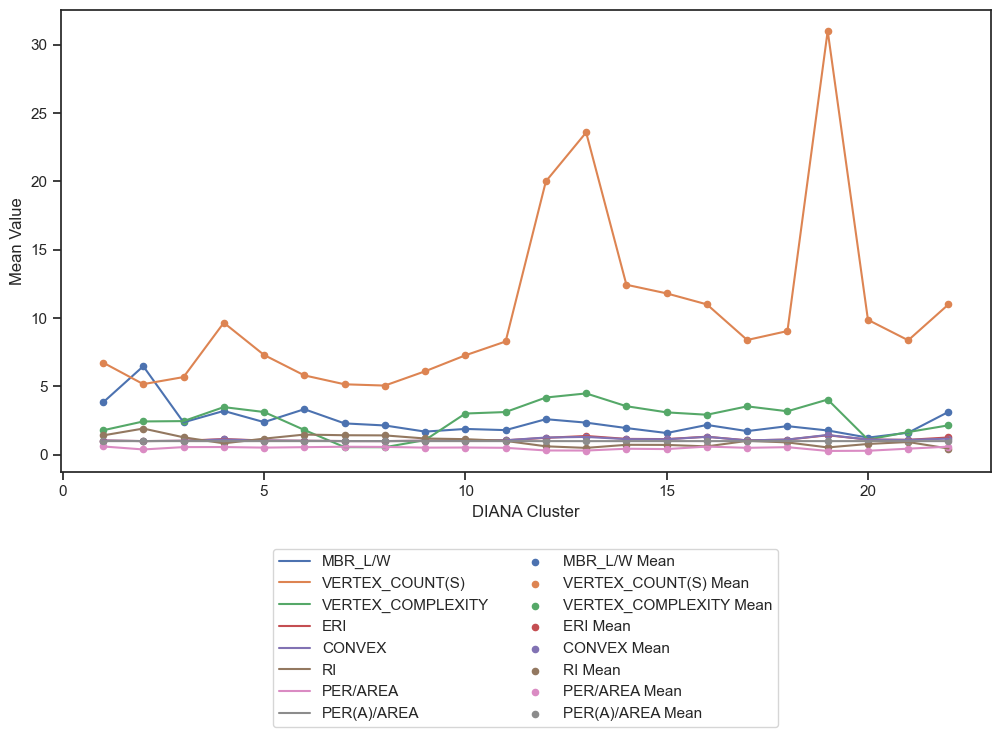

In [83]:
# Group the DataFrame by "DIANA Cluster" and calculate the mean for each group
means = df_data03.groupby('DIANA Cluster').mean().reset_index()

# Set the figure size
plt.figure(figsize=(12, 6))

# Get the column names except for "DIANA Cluster"
columns = means.columns.drop('DIANA Cluster')

# Plot a line graph for each column's mean
for column in columns:
    plt.plot(means['DIANA Cluster'], means[column], label=column)

# Calculate the mean values for each column within each "DIANA Cluster"
cluster_means = df_data03.groupby('DIANA Cluster').mean()

# Plot the data points with increased marker size and line width
for column in columns:
    plt.scatter(cluster_means.index, cluster_means[column], marker='o', s=20, label=f"{column} Mean")

# Set the x-axis label
plt.xlabel('DIANA Cluster')

# Set the y-axis label
plt.ylabel('Mean Value')

# Add a legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

# Show the plot
plt.show()

In [84]:
import io
!pip install bokeh

In [85]:
# Data manipulation
import json 
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import plotly.express as px
from pandas.plotting import scatter_matrix
# interactive visualization
from bokeh.io import output_file, show, output_notebook
from bokeh.models import LinearColorMapper, ColumnDataSource
from bokeh.plotting import figure
from bokeh.palettes import Turbo256
from bokeh.layouts import column, row, gridplot

# Machine Learning
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
# dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [86]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [89]:
# ensure all data-points are numeric
df = df.apply(pd.to_numeric, errors='raise')
df.describe().T

count          mean           std           min  \
X                  98971.0  5.442921e+05  6.212273e+03  5.284629e+05   
Y                  98971.0  6.865841e+06  5.134700e+03  6.850672e+06   
OSM_ID             98971.0  2.774901e+08  4.249873e+07  3.579678e+06   
AGE                98971.0  1.906935e+03  2.021008e+02  1.005000e+03   
HEIGHT             98971.0  1.108535e+01  4.042915e+00  3.502350e+00   
AREA               98971.0  9.036685e+01  9.608597e+01  9.326000e+00   
VOLUME             98971.0  1.121226e+03  1.659250e+03  6.246654e+01   
MBR_LENGTH         98971.0  1.265033e+01  5.848092e+00  3.639638e+00   
MBR_WIDTH          98971.0  7.128094e+00  3.236554e+00  1.688715e+00   
MBR_L/W            98971.0  1.877354e+00  6.809055e-01  1.000000e+00   
PERIMETER          98971.0  3.959244e+01  1.732264e+01  1.274652e+01   
WALL_AREA          98971.0  4.632705e+02  3.437362e+02  7.245649e+01   
VERTEX_COUNT(S)    98971.0  6.836255e+00  3.048661e+00  4.000000e+00   
VERTEX_COMPLEXITY  98971.0  1.722390e+00  1.608051e+00  1.851900e-02   
ERI                98971.0  1.039116e+00  7.096465e-02  8.866080e-01   
CONVEX             98971.0  1.038149e+00  6.698451e-02  9.888180e-01   
RI                 98971.0  1.169935e+00  2.595413e-01  1.147200e-01   
DENSITY            98971.0  5.520618e+00  1.182934e+02  6.098800e-02   
NO_POLYLINES       98971.0  1.001839e+00  4.377661e-02  1.000000e+00   
BBOX(A)/AREA       98971.0  9.317376e-01  9.110817e-02  1.096560e-01   
PER/AREA           98971.0  5.275139e-01  1.217248e-01  8.935500e-02   
AREA-VOIDAREA      98971.0  9.029950e+01  9.566407e+01  9.326000e+00   
PER(A)/AREA        98971.0  9.998403e-01  4.557481e-03  6.877220e-01   
Cluster            98971.0  5.007901e+00  8.853786e-02  5.000000e+00   
Birch Cluster      98971.0  1.689294e+03  1.903144e+03  0.000000e+00   
DIANA Cluster      98971.0  9.460711e+00  2.193702e+00  1.000000e+00   

                            25%           50%           75%           max  
X                  5.403983e+05  5.443039e+05  5.485224e+05  5.626257e+05  
Y                  6.863298e+06  6.865662e+06  6.869099e+06  6.877230e+06  
OSM_ID             2.751151e+08  2.771657e+08  2.806042e+08  1.153501e+09  
AGE                1.922000e+03  1.950000e+03  1.987000e+03  2.016000e+03  
HEIGHT             7.793455e+00  1.000550e+01  1.488355e+01  4.026840e+01  
AREA               5.112945e+01  6.431610e+01  8.996258e+01  2.274877e+03  
VOLUME             3.965600e+02  7.092887e+02  1.238835e+03  3.933301e+04  
MBR_LENGTH         9.745484e+00  1.135132e+01  1.379716e+01  9.170630e+01  
MBR_WIDTH          5.331017e+00  6.024965e+00  7.790591e+00  4.896540e+01  
MBR_L/W            1.416759e+00  1.761251e+00  2.155936e+00  1.023933e+01  
PERIMETER          3.051650e+01  3.499487e+01  4.235165e+01  3.483784e+02  
WALL_AREA          2.384240e+02  3.799521e+02  5.900104e+02  5.886088e+03  
VERTEX_COUNT(S)    5.000000e+00  5.000000e+00  7.000000e+00  8.900000e+01  
VERTEX_COMPLEXITY  1.275000e-01  1.730000e+00  2.941429e+00  1.425000e+01  
ERI                9.999910e-01  1.003348e+00  1.052138e+00  3.020963e+00  
CONVEX             1.000000e+00  1.006228e+00  1.052603e+00  5.062548e+00  
RI                 1.004023e+00  1.257148e+00  1.354134e+00  2.328692e+00  
DENSITY            1.054160e+00  1.274820e+00  1.538148e+00  1.115430e+04  
NO_POLYLINES       1.000000e+00  1.000000e+00  1.000000e+00  3.000000e+00  
BBOX(A)/AREA       8.940705e-01  9.710770e-01  9.985100e-01  1.000000e+00  
PER/AREA           4.618995e-01  5.432570e-01  6.104385e-01  2.070652e+00  
AREA-VOIDAREA      5.112945e+01  6.431610e+01  8.989950e+01  2.274877e+03  
PER(A)/AREA        1.000000e+00  1.000000e+00  1.000000e+00  1.000151e+00  
Cluster            5.000000e+00  5.000000e+00  5.000000e+00  6.000000e+00  
Birch Cluster      3.380000e+02  4.210000e+02  3.258000e+03  5.778000e+03  
DIANA Cluster      9.000000e+00  9.000000e+00  1.000000e+01  2.200000e+01

In [90]:
# Select subset of columns aka variables
columns_of_interest = ['MBR_L/W', 'VERTEX_COUNT(S)', 'VERTEX_COMPLEXITY', 'ERI', 'CONVEX', 'RI', 'PER/AREA', 'PER(A)/AREA', 'OSM_ID', 'X', 'Y', 'Cluster', 'DIANA Cluster']

# Create a new dataframe with the selected columns
df = df[columns_of_interest]


In [91]:
# Extract coords from data
df_coords = df[['X', 'Y']]

df_data   = df.drop(['X', 'Y',"Cluster", "OSM_ID"], axis=1)

# Scale data
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(
    scaler.fit_transform(df_data),
    columns=df_data.columns)

In [92]:
def map_clustering_results(coords, model):
    labels = model.labels_
    for label in np.unique(labels):
        x = coords['X'].to_numpy()[labels == label]
        y = coords['Y'].to_numpy()[labels == label]
        plt.scatter(x, y, label=model.labels_)

In [93]:
# Initialize PCA object and train it with our dataframe!
pca_obj = PCA(n_components=2)
principalComponent_out = pca_obj.fit_transform(df_data)

In [94]:
# Explained variation per principal component:
print(pca_obj.explained_variance_ratio_)

[0.69680804 0.1921363 ]


In [95]:
# safe to dataframe, rename columns as principal component 1 & 2
pca_df = pd.DataFrame(data = principalComponent_out
             , columns = ['pc1', 'pc2'])

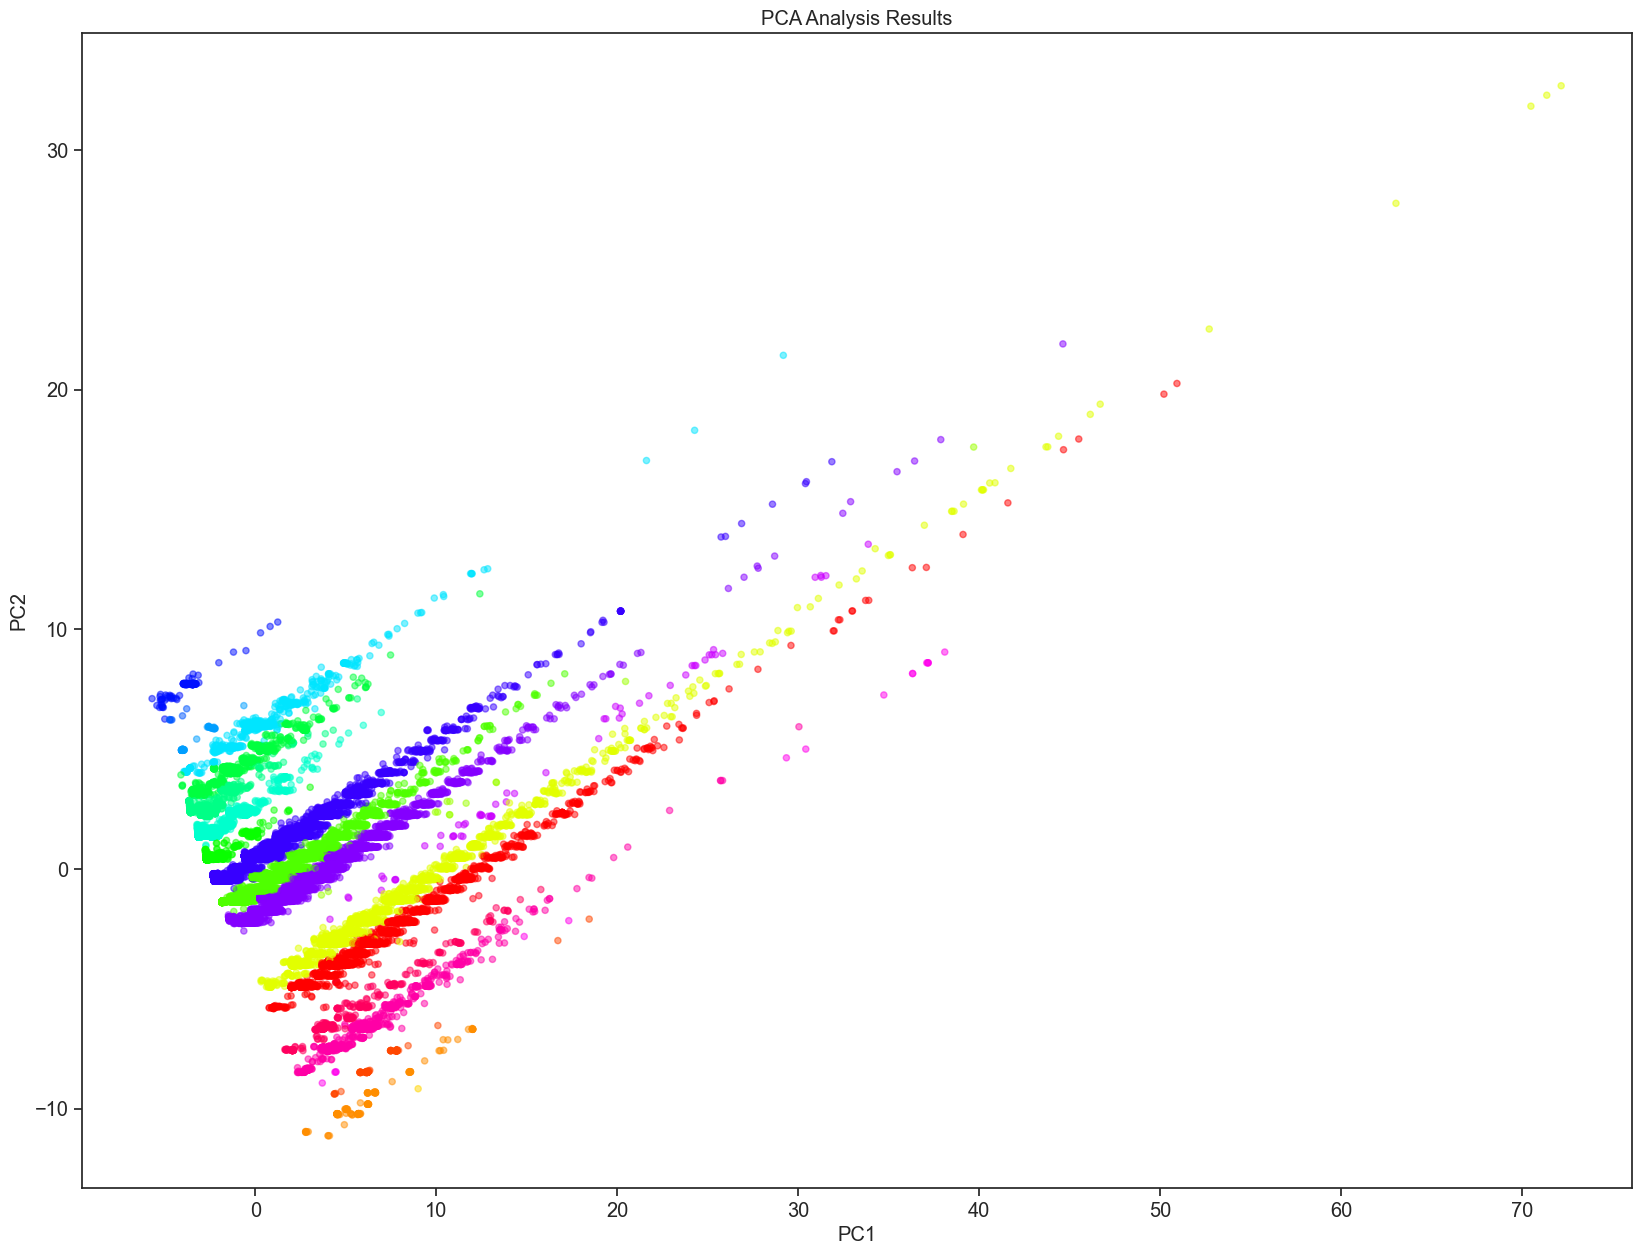

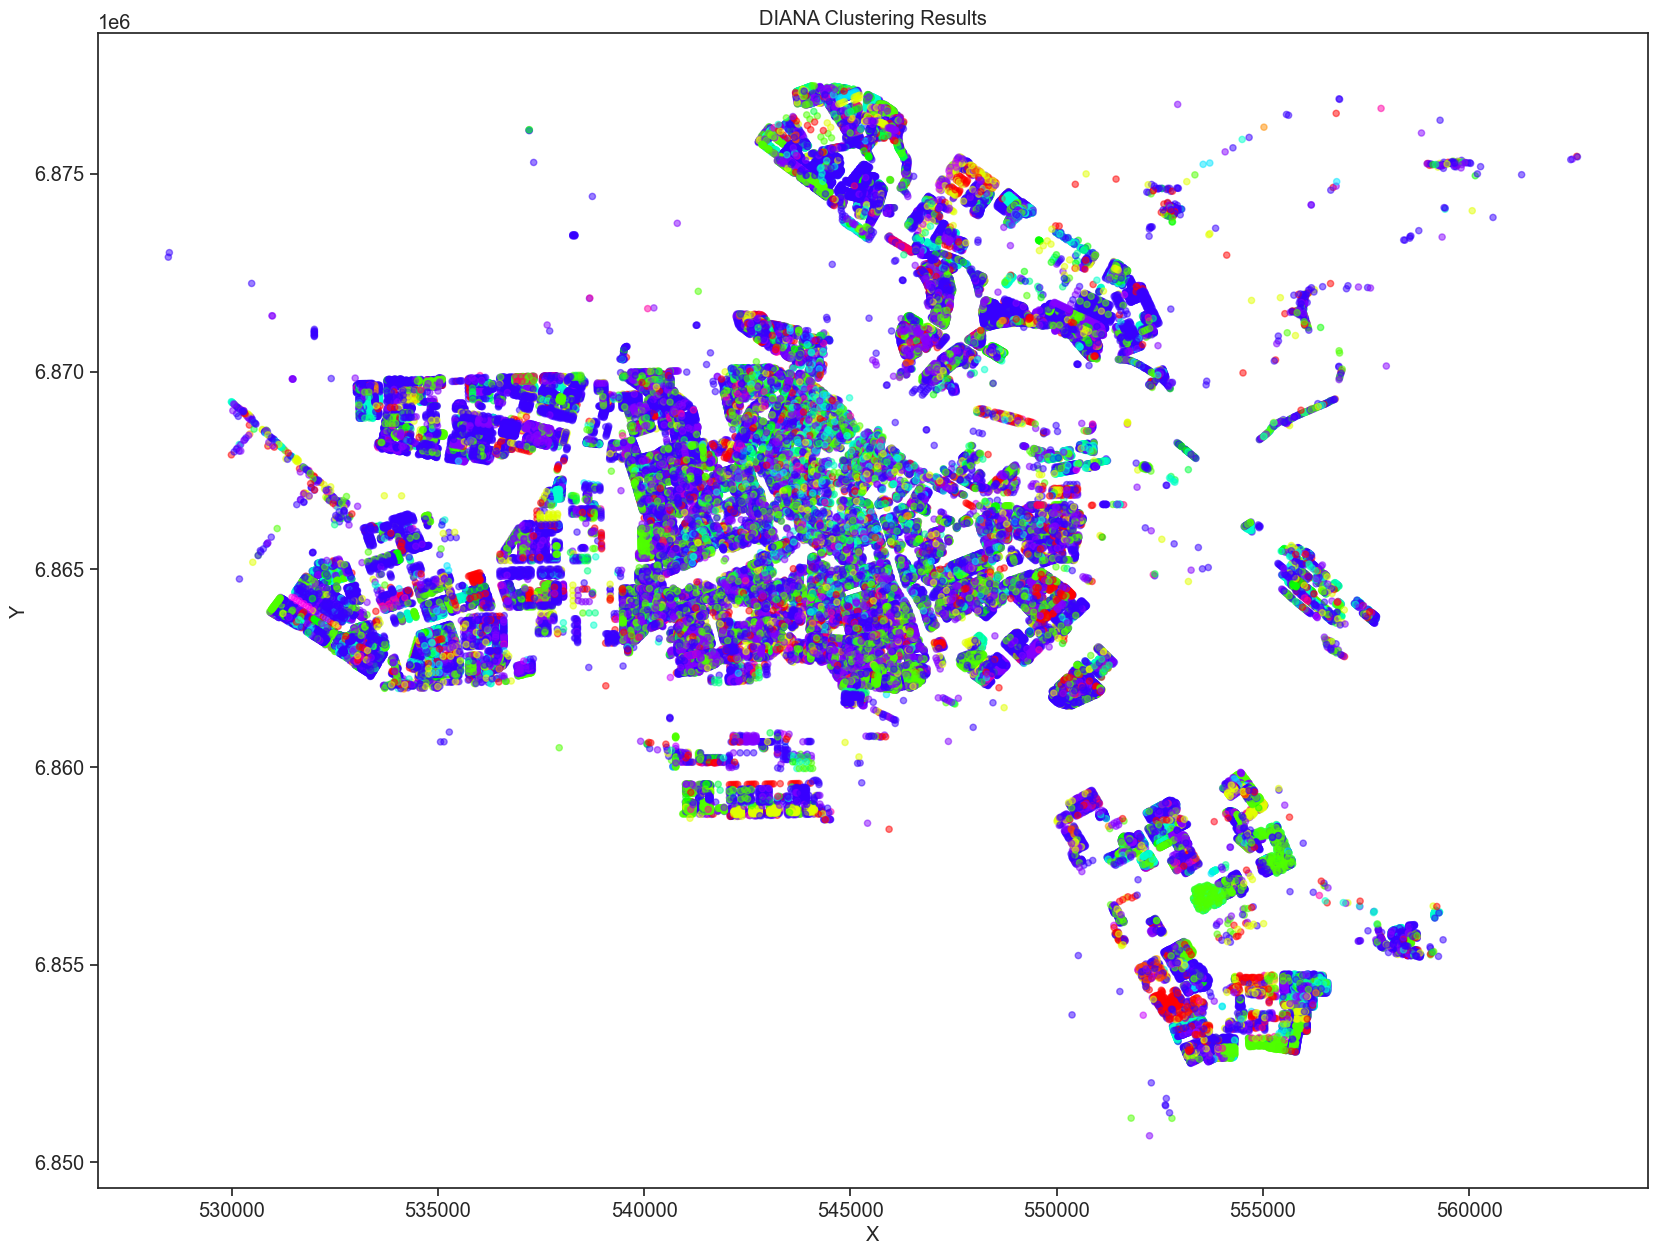

In [101]:
import numpy as np
import matplotlib.pyplot as plt

# Set plot parameters
plt.rcParams.update({'font.size': 12,
                     'figure.figsize': (10, 8),
                     'axes.labelsize': 'large',
                     'axes.titlesize': 'large',
                     'xtick.labelsize': 'large',
                     'ytick.labelsize': 'large',
                     'legend.fontsize': 'large'})

# PCA Analysis Results
plt.figure(figsize=(20, 15))
plt.scatter(pca_df['pc1'], pca_df['pc2'], s=20, c=df['DIANA Cluster'].map(color_map), alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Analysis Results')
plt.show()

# DIANA Clustering Results
plt.figure(figsize=(20, 15))
plt.scatter(df['X'], df['Y'], s=20, c=labels.map(color_map), alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('DIANA Clustering Results')
plt.show()


In [102]:
#Approach 2: T-SNE

In [103]:
# initializing tsne, 
# experiment with perplexity 
tsne_obj = TSNE(n_components=2, perplexity=15)
data_tsne = tsne_obj.fit_transform(df_data)

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [104]:
# tsne data to dataframe
tsneDF = pd.DataFrame(data=data_tsne, columns=["tsne1", "tsne2"])

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\james\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



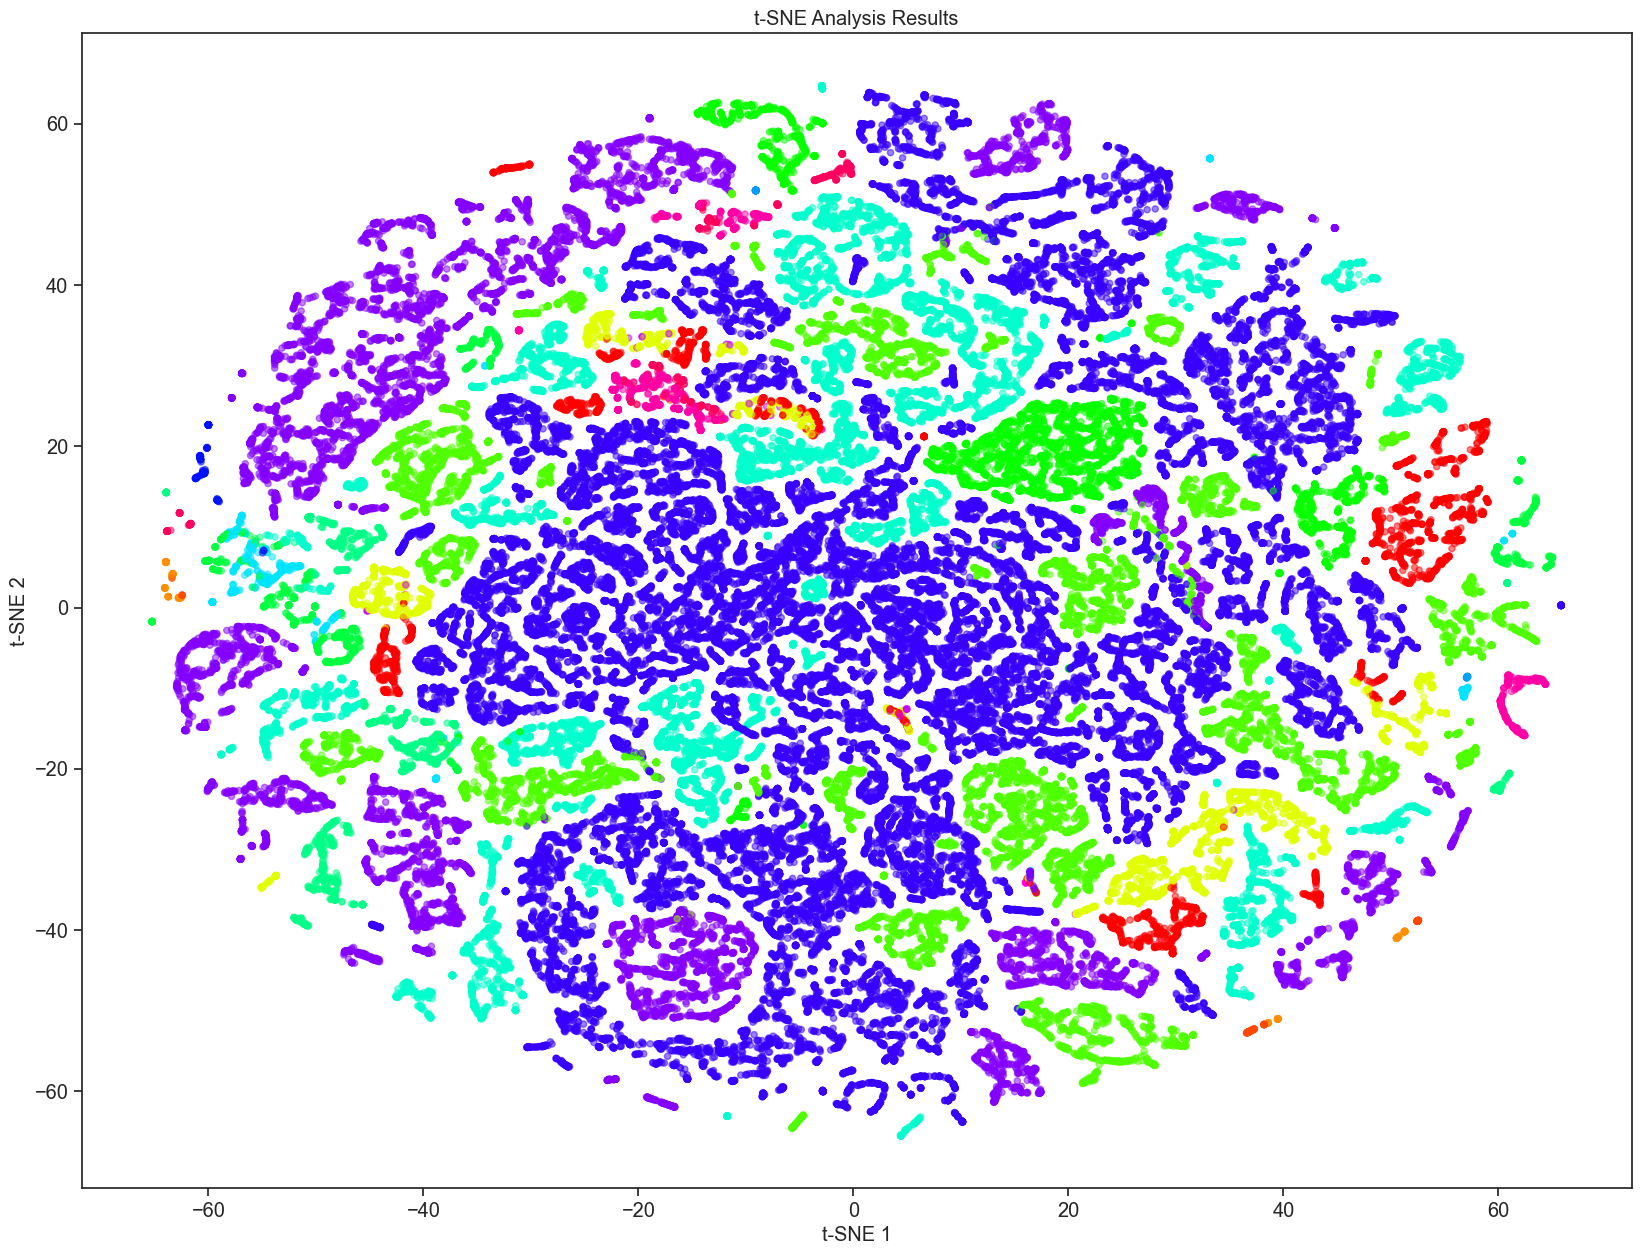

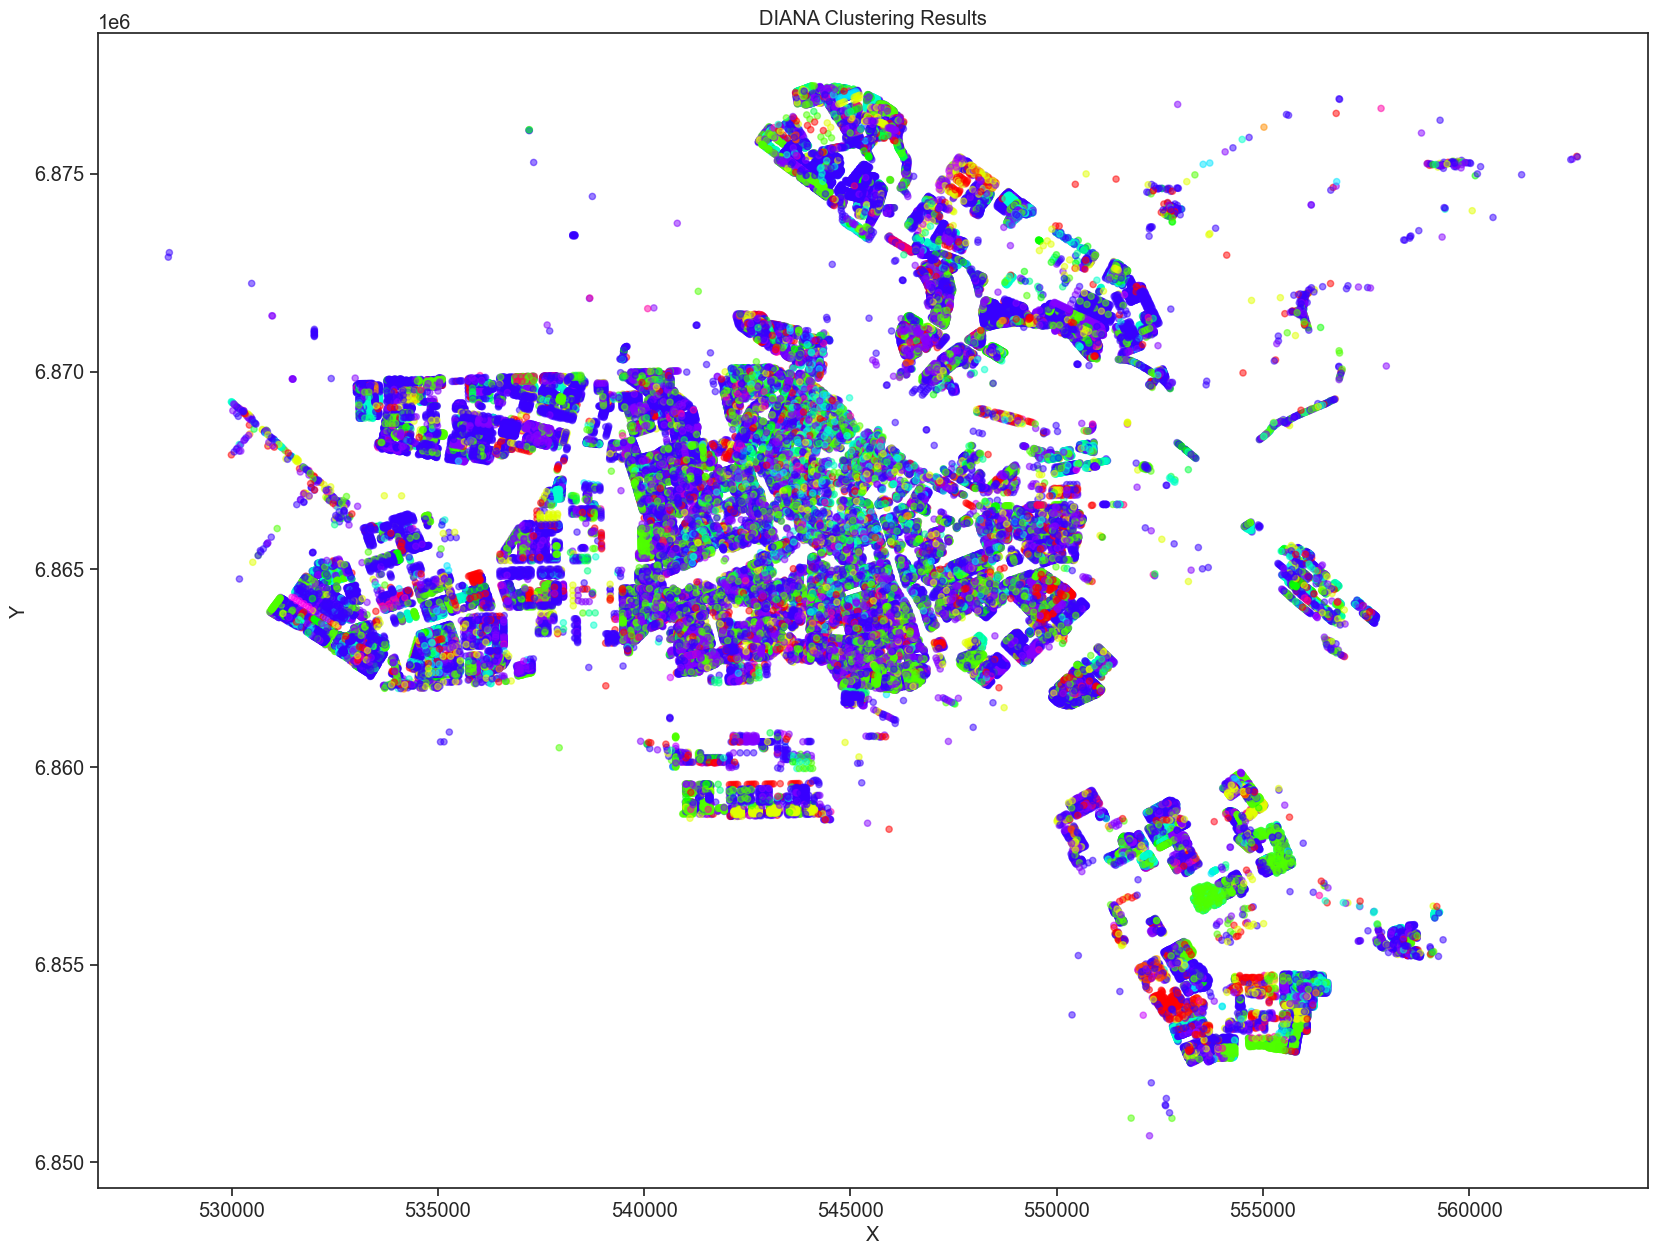

In [106]:
# Set plot parameters
plt.rcParams.update({'font.size': 12,
                     'figure.figsize': (10, 8),
                     'axes.labelsize': 'large',
                     'axes.titlesize': 'large',
                     'xtick.labelsize': 'large',
                     'ytick.labelsize': 'large',
                     'legend.fontsize': 'large'})

# initializing tsne, 
# experiment with perplexity 
tsne_obj = TSNE(n_components=2, perplexity=15)
data_tsne = tsne_obj.fit_transform(df_data)

# tsne data to dataframe
tsneDF = pd.DataFrame(data=data_tsne, columns=["tsne1", "tsne2"])

# plot tsne results
plt.figure(figsize=(20, 15))
plt.scatter(tsneDF['tsne1'], tsneDF['tsne2'], s=20, c=df["DIANA Cluster"].map(color_map), alpha=0.5)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Analysis Results')
plt.show()

# plot original map with clusters
plt.figure(figsize=(20, 15))
plt.scatter(df['X'], df['Y'], s=20, c=df["DIANA Cluster"].map(color_map), alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('DIANA Clustering Results')
plt.show()